In [1]:
# Libraries that we need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'png'
pd.set_option("display.float_format",lambda x: "%.2f" %x)

# Load Data

In [2]:
df=pd.read_csv("Tadawul_stcks.csv") # read csv file
df

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-05,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.00,15399073.50,804.00
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-04,34.70,35.65,34.50,35.30,0.25,0.71,737624.00,25981391.35,1268.00
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-03,34.70,35.15,34.70,35.05,1.05,3.09,489831.00,17116413.40,854.00
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-02,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.00,25858700.60,1242.00
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-01,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.00,25747967.55,1625.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593814,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-28,22.90,22.90,21.62,22.50,0.00,0.00,1860532.00,41495658.12,2023.00
593815,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-27,23.30,23.32,22.24,22.50,-0.84,-3.60,4905676.00,111416790.80,3259.00
593816,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-26,24.60,24.60,23.30,23.34,-1.16,-4.73,3908215.00,92698622.90,2672.00
593817,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-23,24.80,25.00,24.34,24.50,-0.50,-2.00,4078214.00,100222057.60,5571.00


# Data Cleaning

In [3]:
df.info()  # show the total information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593819 entries, 0 to 593818
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   symbol          593819 non-null  int64  
 1   name            593819 non-null  object 
 2   trading_name    593819 non-null  object 
 3   sectoer         593819 non-null  object 
 4   date            593819 non-null  object 
 5   open            587364 non-null  float64
 6   high            587122 non-null  float64
 7   low             587122 non-null  float64
 8   close           593819 non-null  float64
 9   change          593819 non-null  float64
 10  perc_Change     593819 non-null  float64
 11  volume_traded   593819 non-null  float64
 12  value_traded    593819 non-null  float64
 13  no_trades       586128 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 63.4+ MB


In [4]:
df.describe() #summary statistic

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
count,593819.00,587364.00,587122.00,587122.00,593819.00,593819.00,593819.00,593819.00,593819.00,586128.00
mean,3952.68,41.24,41.97,40.59,40.96,0.00,0.04,1673421.74,50085532.40,960.64
std,2284.50,86.71,89.18,84.56,86.49,4.78,3.48,5482121.38,147296872.59,3401.79
min,1010.00,1.95,1.95,1.95,0.00,-681.20,-100.00,0.00,0.00,0.00
25%,2140.00,16.20,16.40,16.00,16.07,-0.25,-0.91,148492.00,4114858.17,158.00
50%,4004.00,26.50,26.91,26.10,26.30,0.00,0.00,433556.00,12105328.50,376.00
75%,5110.00,46.50,47.20,45.85,46.20,0.25,0.91,1271184.00,35610168.30,900.00
max,8312.00,6709.15,6774.51,6130.72,6441.18,578.43,1634.44,797665866.00,15865822896.55,816526.00


In [5]:
df.head() # show the top five rows 

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-05,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.00,15399073.50,804.00
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-04,34.70,35.65,34.50,35.30,0.25,0.71,737624.00,25981391.35,1268.00
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-03,34.70,35.15,34.70,35.05,1.05,3.09,489831.00,17116413.40,854.00
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-02,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.00,25858700.60,1242.00
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-01,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.00,25747967.55,1625.00


In [6]:
df.tail() # show the low five rows

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
593814,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-28,22.90,22.90,21.62,22.50,0.00,0.00,1860532.00,41495658.12,2023.00
593815,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-27,23.30,23.32,22.24,22.50,-0.84,-3.60,4905676.00,111416790.80,3259.00
593816,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-26,24.60,24.60,23.30,23.34,-1.16,-4.73,3908215.00,92698622.90,2672.00
593817,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-23,24.80,25.00,24.34,24.50,-0.50,-2.00,4078214.00,100222057.60,5571.00
593818,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-22,26.00,26.10,23.60,25.00,-1.00,-3.85,14220388.00,350263308.17,7183.00


In [7]:
df.sample(10) #show ten row randomly

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
568606,4100,Makkah Construction and Development Co.,MCDC,Real Estate,2017-05-02,109.00,110.00,108.00,109.75,0.41,0.37,32676.00,3553715.25,127.00
168377,2040,Saudi Ceramic Co.,SAUDI CERAMICS,Industrials,2011-05-02,56.70,57.30,56.50,57.03,0.78,1.39,177786.00,10108207.25,149.00
118477,3010,Arabian Cement Co.,ACC,Materials,2017-04-16,38.00,38.00,37.60,37.82,-0.07,-0.18,432065.00,16330633.60,287.00
184216,2160,Saudi Arabian Amiantit Co.,AMIANTIT,Industrials,2004-09-04,121.52,127.39,120.68,125.71,5.03,4.17,772499.00,96642019.75,522.00
592571,4310,Knowledge Economic City,KEC,Real Estate,2010-08-28,8.85,8.90,8.75,8.80,0.10,1.15,3805044.00,33525062.30,1990.00
403426,1090,Samba Financial Group,SAMBA,Financials,2003-02-01,13.85,14.20,13.40,13.95,-0.33,-2.31,564281.00,7714021.75,78.00
279941,4190,Jarir Marketing Co.,JARIR,Consumer Discretionary,2014-02-24,132.61,132.79,132.04,132.23,-0.56,-0.42,28170.00,3731442.25,68.00
335288,6050,Saudi Fisheries Co.,SFICO,Consumer Staples,2014-12-22,162.18,166.14,158.72,163.37,2.02,1.25,189847.00,30997976.00,911.00
142749,3060,Yanbu Cement Co.,YCC,Materials,2014-12-11,62.50,64.25,60.25,64.11,0.37,0.58,393465.00,24348945.25,232.00
320264,6010,National Agricultural Development Co.,NADEC,Consumer Staples,2018-05-27,34.00,34.20,34.00,34.20,0.10,0.29,26263.00,895684.30,69.00


In [8]:
df.dtypes # know the type of data


symbol              int64
name               object
trading_name       object
sectoer            object
date               object
open              float64
high              float64
low               float64
close             float64
change            float64
perc_Change       float64
volume_traded     float64
value_traded      float64
no_trades         float64
dtype: object

In [9]:
df.shape # show how many columns and rows

(593819, 14)

In [10]:
df.columns # show the name of columns

Index(['symbol', 'name', 'trading_name ', 'sectoer', 'date', 'open', 'high',
       'low', 'close', 'change', 'perc_Change', 'volume_traded ',
       'value_traded', 'no_trades '],
      dtype='object')

In [11]:
df.columns = df.columns.str.replace(' ', '')

In [12]:
df['date']=pd.to_datetime(df['date'])

In [13]:
df['day'] = df['date'].dt.day_name()

In [14]:
df.drop(columns=['symbol', 'trading_name', 'date', 'value_traded', 'no_trades'], axis=1, inplace=True) 
# drob the unnecessary columns

In [15]:
df['name'].unique() # show the value in name column

array(['Saudi Arabia Refineries Co.', 'Saudi Arabian Oil Co.',
       'Rabigh Refining and Petrochemical Co.',
       'National Shipping Company of Saudi Arabia',
       'Aldrees Petroleum and Transport Services Co.',
       'Takween Advanced Industries Co.', 'Middle East Paper Co.',
       'Basic Chemical Industries Co.', 'Saudi Arabian Mining Co.',
       'United Wire Factories Co.', 'Al Yamamah Steel Industries Co.',
       'Saudi Steel Pipe Co.', 'Methanol Chemicals Co.',
       'National Petrochemical Co.', 'Saudi Basic Industries Corp.',
       'Saudi Arabian Fertilizer Co.', 'National Industrialization Co.',
       'National Gypsum Co.', 'The National Company for Glass Industries',
       'Alujain Holding Corp.',
       'Filing and Packing Materials Manufacturing Co.',
       'Arabian Pipes Co.', 'Nama Chemicals Co.',
       'National Metal Manufacturing and Casting Co.',
       'Zamil Industrial Investment Co.',
       'Saudi Industrial Investment Group',
       'Yanbu National

In [16]:
worng_val= df[(df['name'] ==509.0) |(df['name'] ==26.3) |(df['name'] ==26.9)
           |(df['name'] ==26.5) |(df['name'] ==26.3) |(df['name']==6709.15)].index
df.drop(worng_val, inplace=True) # drop worng value

In [17]:
df['day'].unique() # show the value in name column

array(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday'],
      dtype=object)

In [18]:
worng_val= df[(df['day']==-0.02)].index
df.drop(worng_val, inplace=True) # drop worng value 

In [19]:
df.head() # show the top five rows

,name,sectoer,open,high,low,close,change,perc_Change,volume_traded,day
0,Saudi Arabia Refineries Co.,Energy,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.00,Thursday
1,Saudi Arabia Refineries Co.,Energy,34.70,35.65,34.50,35.30,0.25,0.71,737624.00,Wednesday
2,Saudi Arabia Refineries Co.,Energy,34.70,35.15,34.70,35.05,1.05,3.09,489831.00,Tuesday
3,Saudi Arabia Refineries Co.,Energy,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.00,Monday
4,Saudi Arabia Refineries Co.,Energy,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.00,Sunday


In [20]:
df.duplicated().sum() # show the duplicates

3622

In [21]:
df.loc[df.duplicated(), :] # Extract duplicate rows

,name,sectoer,open,high,low,close,change,perc_Change,volume_traded,day
54960,National Gypsum Co.,Materials,27.50,27.50,27.50,27.50,0.00,0.00,7920.00,Tuesday
59412,The National Company for Glass Industries,Materials,NaN,NaN,NaN,7.70,0.00,0.00,376.00,Tuesday
59580,Alujain Holding Corp.,Materials,NaN,NaN,NaN,19.08,0.00,0.00,0.00,Thursday
59581,Alujain Holding Corp.,Materials,NaN,NaN,NaN,19.08,0.00,0.00,0.00,Wednesday
59582,Alujain Holding Corp.,Materials,NaN,NaN,NaN,19.08,0.00,0.00,0.00,Tuesday
...,...,...,...,...,...,...,...,...,...,...
539219,Etihad Atheeb Telecommunication Co.,Communication Services,NaN,NaN,NaN,0.00,0.00,0.00,0.00,Tuesday
539220,Etihad Atheeb Telecommunication Co.,Communication Services,NaN,NaN,NaN,0.00,0.00,0.00,0.00,Monday
539221,Etihad Atheeb Telecommunication Co.,Communication Services,NaN,NaN,NaN,0.00,0.00,0.00,0.00,Sunday
539222,Etihad Atheeb Telecommunication Co.,Communication Services,NaN,NaN,NaN,0.00,0.00,0.00,0.00,Saturday


In [22]:
df.drop_duplicates(inplace=True) # drop the duplicates

In [23]:
df.shape # show how many columns and rows

(590197, 10)

In [24]:
df = df.replace(0,np.nan) # replace all 0 value to null value 

In [25]:
df_list= list(df.columns.values)   # show all null value in columns

for i in df_list:
    print (i,": ",sum(pd.isnull(df[i])))

name :  0
sectoer :  0
open :  2857
high :  3097
low :  3097
close :  49
change :  69571
perc_Change :  69698
volume_traded :  423
day :  0


In [26]:
df['open'].fillna(df['open'].mean(),inplace=True) # put in all null value in columns columns mean 
df['high'].fillna(df['high'].mean(),inplace=True)
df['low'].fillna(df['low'].mean(),inplace=True)
df['close'].fillna(df['close'].mean(),inplace=True)
df['change'].fillna(df['change'].mean(),inplace=True)
df['perc_Change'].fillna(df['perc_Change'].mean(),inplace=True)
df['volume_traded'].fillna(df['volume_traded'].mean(),inplace=True)

In [27]:
df_list= list(df.columns.values) #show all null value 

for i in df_list:
    print (i,": ",sum(pd.isnull(df[i])))

name :  0
sectoer :  0
open :  0
high :  0
low :  0
close :  0
change :  0
perc_Change :  0
volume_traded :  0
day :  0


## Solve the questions

### Q1) What is the most sectoer in the saudi stock market(TADAWAL)?

In [28]:
most_sectoer=df["sectoer"].value_counts()
most_sectoer

Financials                152744
Materials                 142192
Consumer Staples           65359
Industrials                64125
Consumer Discretionary     55668
Real Estate                44663
Communication Services     21431
Health Care                17855
Energy                     15803
Utilities                   9386
Information Technology       971
Name: sectoer, dtype: int64

In [29]:
most_sectoer.index

Index(['Financials', 'Materials', 'Consumer Staples', 'Industrials',
       'Consumer Discretionary', 'Real Estate', 'Communication Services',
       'Health Care', 'Energy', 'Utilities', 'Information Technology'],
      dtype='object')

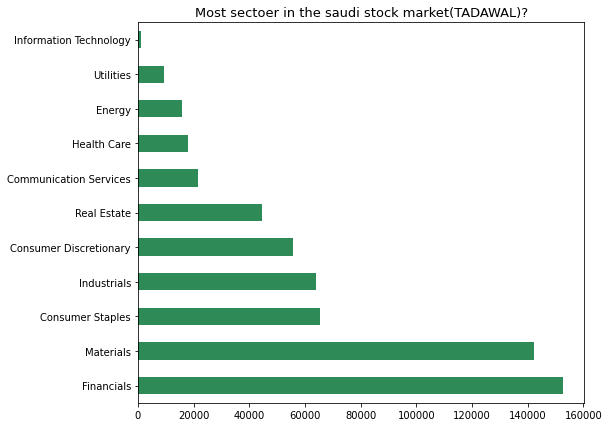

In [30]:
plt.figure(figsize = [8,7])
plt.title("Most sectoer in the saudi stock market(TADAWAL)?",fontsize=13)
most_sectoer.plot(kind="barh", color="#2e8b57");
plt.savefig('SDAIA.png')

### Q2) What are the top ten companies in the Saudi Stock Market(Tadawul)?

In [31]:
top_5_co=df.groupby("name")[["high"]].max().reset_index().sort_values("high",ascending=False).head(10)
top_5_co

,name,high
43,Anaam International Holding Group,6774.51
149,Saudi Fisheries Co.,1148.64
184,Tihama Advertising and Public Relations Co.,883.00
107,Nama Chemicals Co.,591.50
191,Wafrah for Industry and Development Co.,589.84
159,Saudi Paper Manufacturing Co.,526.96
153,Saudi Industrial Export Co.,522.92
42,Amana Cooperative Insurance Co.,513.30
24,Al-Baha Investment and Development Co.,433.25
133,Saudi Arabia Refineries Co.,421.50


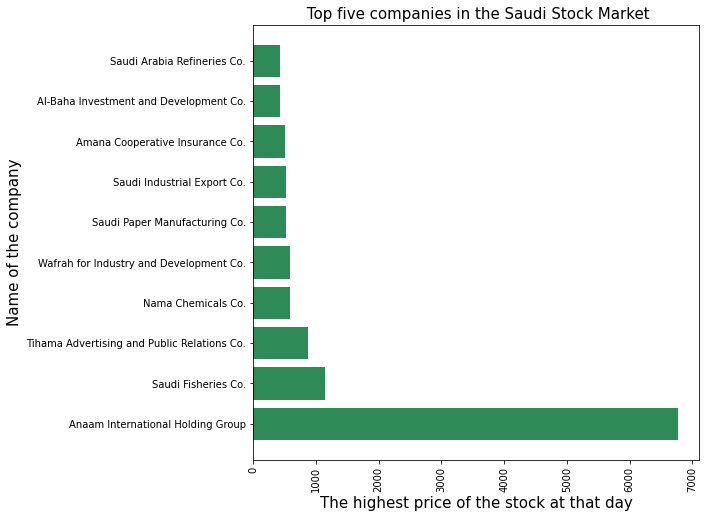

In [32]:
plt.figure(figsize = [8,8])
plt.barh(top_5_co["name"],top_5_co["high"],color="#2e8b57")
plt.title(" Top five companies in the Saudi Stock Market",fontsize =15);
plt.xlabel("The highest price of the stock at that day",fontsize =15);
plt.ylabel("Name of the company",fontsize =15);
plt.rc('xtick',labelsize=12) 
plt.rc('ytick',labelsize=11)
plt.xticks(rotation=90)
plt.savefig('SDAIA.png')

### Q3)  What are the top ten companies which were the biggest exchanges?

In [33]:
top_5_co_=df.groupby("name")[["volume_traded"]].max().reset_index().sort_values("volume_traded",ascending=False).head(10) 
top_5_co_

,name,volume_traded
33,Alinma Bank,797665866.00
138,Saudi Arabian Oil Co.,417927786.00
137,Saudi Arabian Mining Co.,331054101.00
69,Dar Alarkan Real Estate Development Co.,243879933.00
119,Northern Region Cement Co.,234316831.00
121,Rabigh Refining and Petrochemical Co.,228520778.00
157,Saudi Kayan Petrochemical Co.,222362261.00
124,Riyad Bank,197230156.00
59,Banque Saudi Fransi,195405475.00
147,Saudi Electricity Co.,172784450.00


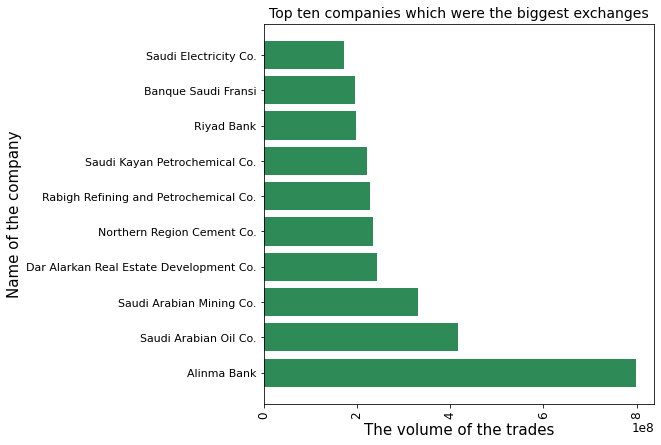

In [34]:
plt.figure(figsize = [7,7])
plt.barh(top_5_co_["name"],top_5_co_["volume_traded"],color="#2e8b57")
plt.title("Top ten companies which were the biggest exchanges",fontsize =14)
plt.xticks(rotation = 90);
plt.xticks(rotation = 90);
plt.xlabel("The volume of the trades",fontsize =15);
plt.ylabel("Name of the company",fontsize =15);
plt.rc('xtick',labelsize=15) 
plt.rc('ytick',labelsize=15)
plt.savefig('SDAIA.png')

### Q4) What is the highest and lowest performance day in the Saudi Stock Market(Tadawul)?

In [35]:
lowest_day=df.groupby("day")[["low"]].sum()
lowest_day

,low
day,
Monday,4641165.81
Saturday,2570061.53
Sunday,4642809.61
Thursday,2784442.88
Tuesday,4637757.00
Wednesday,4682598.15


In [36]:
highest_day=df.groupby("day")[["high"]].sum()
highest_day

,high
day,
Monday,4797969.11
Saturday,2674414.86
Sunday,4803518.69
Thursday,2860171.16
Tuesday,4794097.52
Wednesday,4842120.95


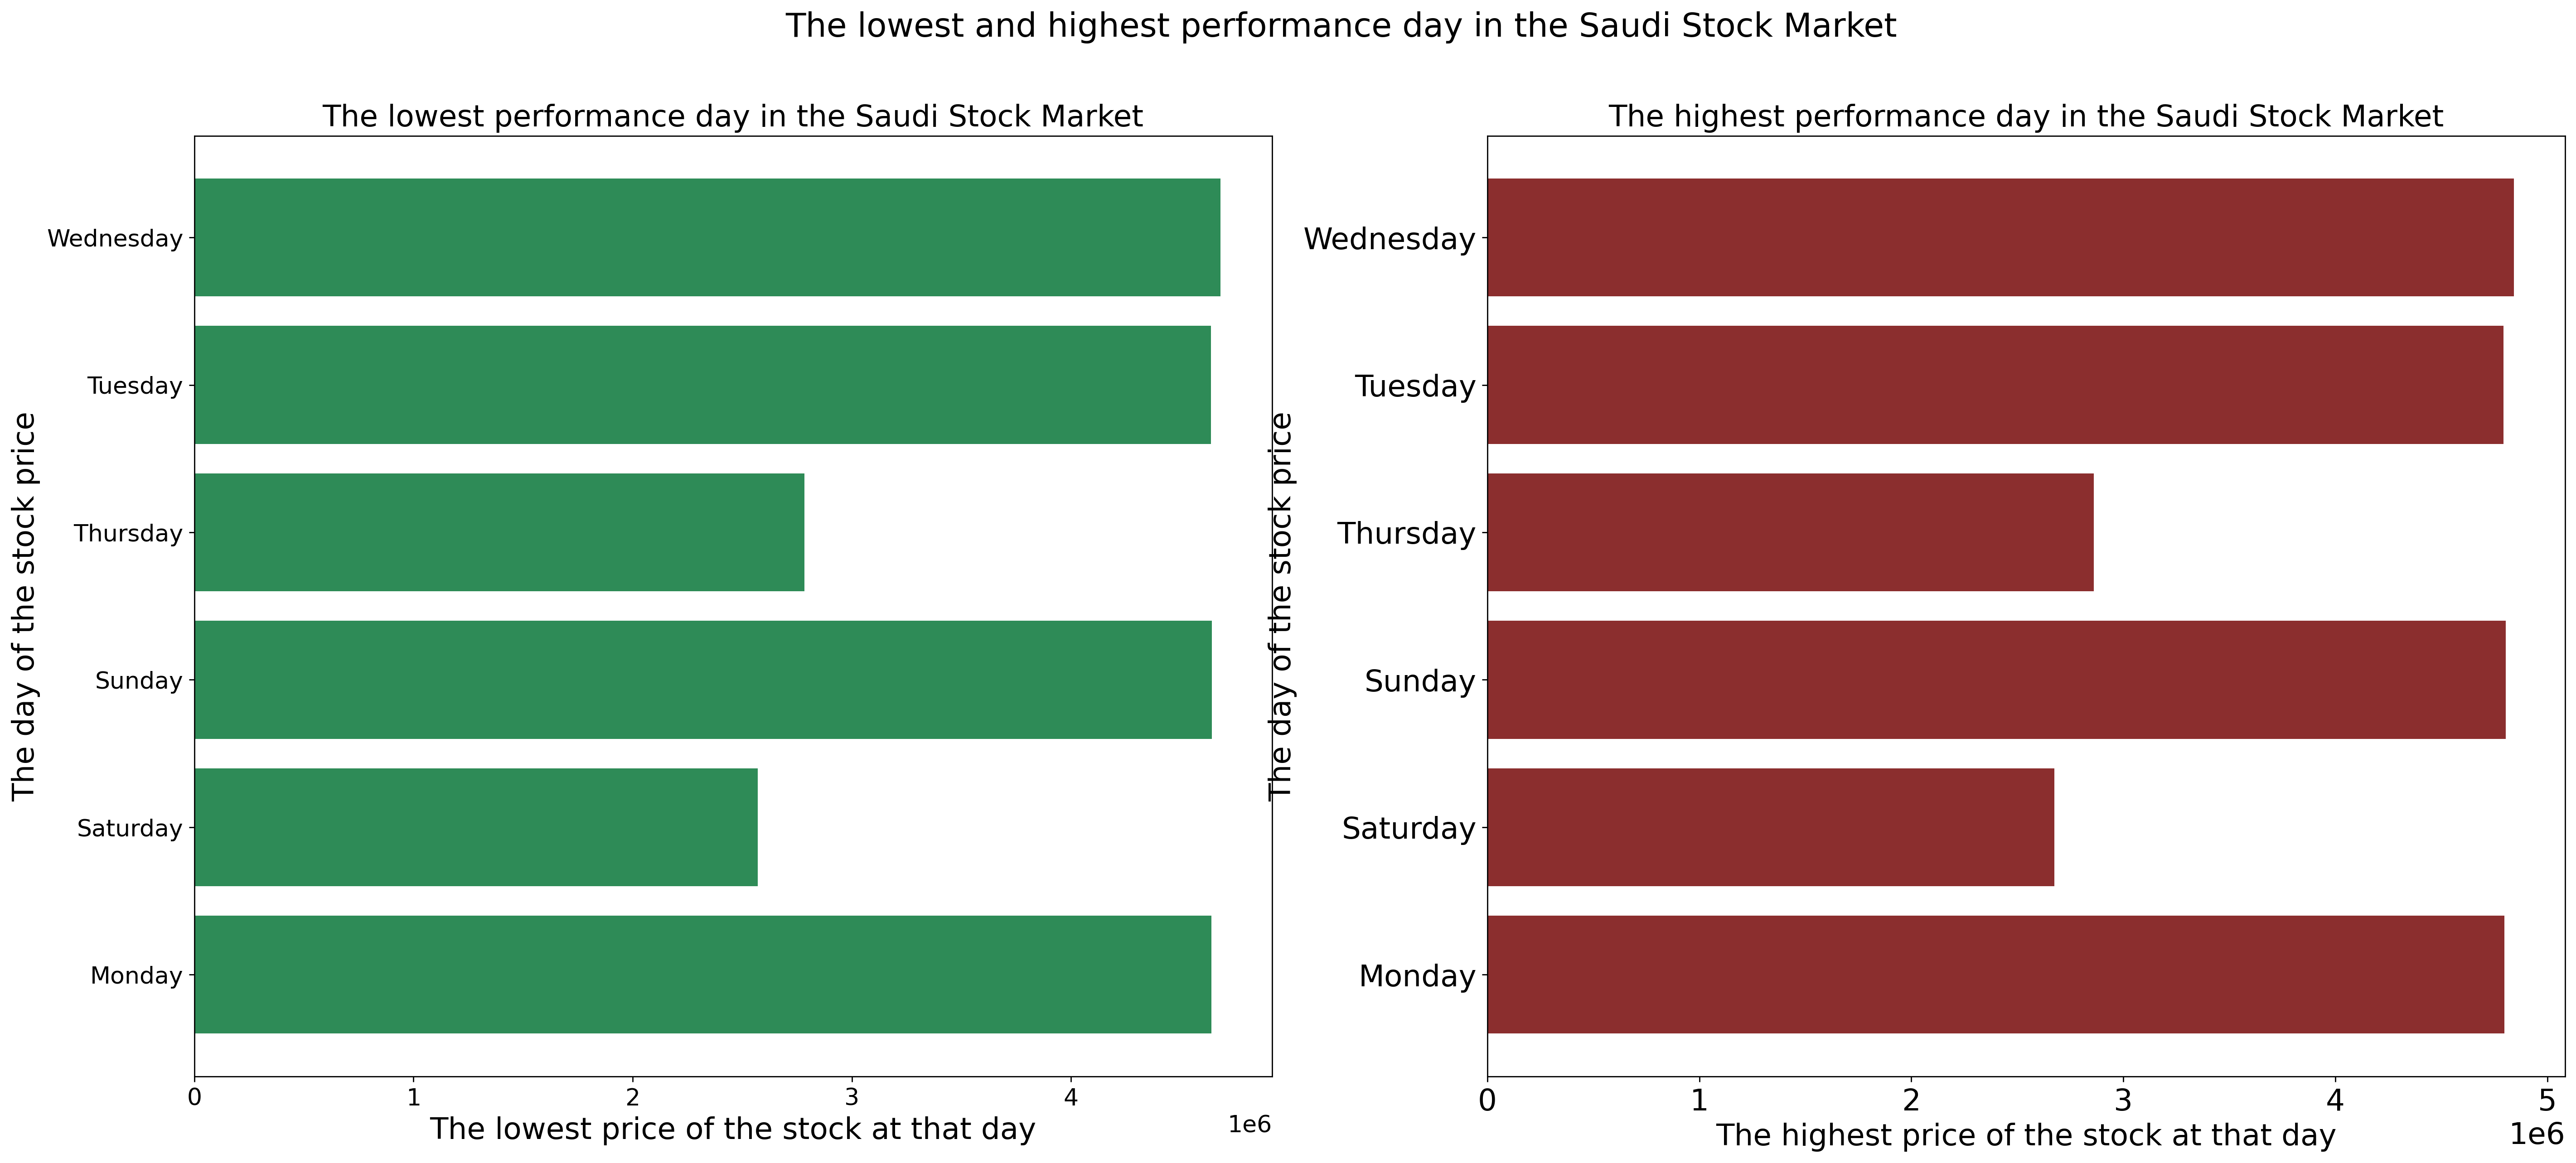

In [37]:
plt.figure(figsize=[27,11],dpi=250)
plt.suptitle("The lowest and highest performance day in the Saudi Stock Market",fontsize =21)
plt.subplot(1,2,1)
plt.barh(lowest_day.index,lowest_day["low"],color="#2e8b57")
plt.title("The lowest performance day in the Saudi Stock Market",fontsize =19)
plt.xlabel("The lowest price of the stock at that day",fontsize =19);
plt.ylabel("The day of the stock price",fontsize =19);
plt.rc('xtick',labelsize=19) 
plt.rc('ytick',labelsize=19)
plt.subplot(1,2,2)
plt.barh(highest_day.index,highest_day["high"],color="#8b2e2e")
plt.title("The highest performance day in the Saudi Stock Market",fontsize =19);
plt.xlabel("The highest price of the stock at that day",fontsize =19);
plt.ylabel("The day of the stock price",fontsize =19);
plt.rc('xtick',labelsize=19) 
plt.rc('ytick',labelsize=19)
plt.savefig('SDAIA.png')

### 5) In which sector was the most profitable in the Saudi Stock Market(Tadawul)?

In [38]:
c=df.groupby(['sectoer'])[['close']].max().sort_values('close', ascending=False)
c

,close
sectoer,
Consumer Staples,6441.18
Communication Services,803.00
Materials,572.40
Industrials,504.71
Financials,479.85
Energy,398.25
Real Estate,241.75
Health Care,181.22
Consumer Discretionary,179.44


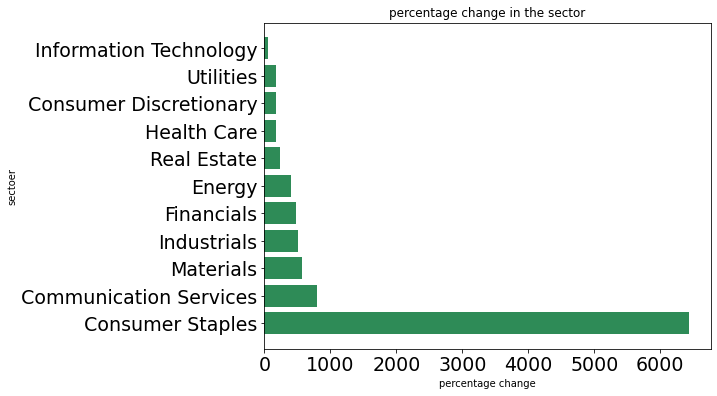

In [39]:
plt.figure(figsize=[8,6]);
plt.barh(c.index,c.close, color="#2e8b57");
plt.title('percentage change in the sector',color='black');
plt.xlabel('percentage change',color='black');
plt.ylabel('sectoer',color='black');
plt.savefig('SDAIA.png')